In [7]:
import pandas as pd
import numpy as np
import torch
import torchvision
import os
import cv2
import PIL
import PIL, cv2
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../../helper_functions_cv/')
from tqdm import tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
csv_file = pd.read_csv('./wiki.csv')
csv_file = csv_file[csv_file['valid_images']!=0.0]

In [11]:
img_path = csv_file['updated_paths'].values.tolist()
box = csv_file['face_location'].values.tolist()

In [12]:
from general_functions.plot_detection import plot_images

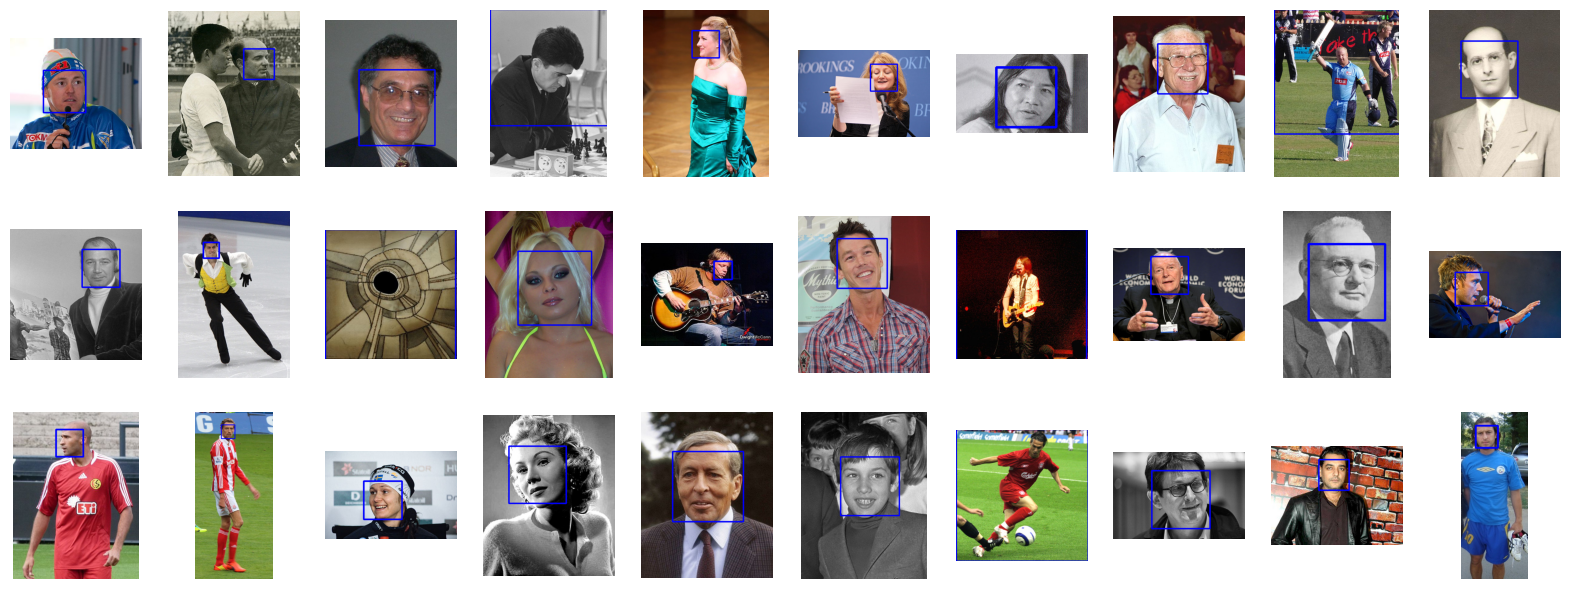

In [13]:
plot_images(img_path[:30], box[:30], (20, 10), 4, 4, 5, 5)

In [ ]:
input_size = 244

def format_image(img, box):
    height, width = img.shape
    max_size = max(height, width)
    r = max_size / input_size
    new_width = int(width / r)
    new_height = int(height / r)
    new_size = (new_width, new_height)
    resized = cv.resize(img, new_size, interpolation= cv.INTER_LINEAR)
    new_image = np.zeros((input_size, input_size), dtype=np.uint8)
    new_image[0:new_height, 0:new_width] = resized

    x, y, w, h = box[0], box[1], box[2], box[3]
    new_box = [int((x - 0.5*w)* width / r), int((y - 0.5*h) * height / r), int(w*width / r), int(h*height / r)]

    return new_image, new_box